# **BMW model price prediction**

- **Number of entries**: 10,781 rows
- **Columns**: 9 in total, including:
  1. **model**: The model of the BMW car
  2. **year**: The year the car was manufactured
  3. **price**: The listed price of the car in the dataset
  4. **transmission**: The type of transmission (e.g., Automatic, Manual)
  5. **mileage**: The total miles the car has been driven
  6. **fuelType**: The type of fuel the car uses (e.g., Diesel, Petrol)
  7. **tax**: The annual road tax cost for the car
  8. **mpg**: Miles per gallon, a measure of fuel efficiency
  9. **engineSize**: The engine size in liters

This data will be useful for predicting the price of BMW cars based on various factors like model, year, mileage, fuel type, etc.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATA READING**

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/PROJECTS/PROJECT 2/bmw.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0
10780,X1,2017,15981,Automatic,59432,Diesel,125,57.6,2.0


In [5]:
df.shape

(10781, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [8]:
df.isna().any()

,0
model,False
year,False
price,False
transmission,False
mileage,False
fuelType,False
tax,False
mpg,False
engineSize,False


In [9]:
columns = df.columns
columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

# **DATA CLEANING**

In [10]:
df.duplicated().any()

True

In [11]:
df.duplicated().sum()

117

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
for i in df.columns:
  print(df[i].unique(),i)
  print('*'*100)
  print(df[i].value_counts(),i)

[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'] model
****************************************************************************************************
model
 3 Series    2434
 1 Series    1962
 2 Series    1188
 5 Series    1051
 4 Series     986
 X1           797
 X3           550
 X5           464
 X2           261
 X4           177
 M4           122
 6 Series     108
 Z4           107
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            26
 M2            21
 i8            17
 M6             8
 Z3             7
Name: count, dtype: int64 model
[2014 2018 2016 2017 2015 2019 2013 2020 2002 2004 2007 2008 2011 2012
 2009 2006 2010 2003 2001 2005 2000 1999 1996 1997 1998] year
**********************************************************************************************

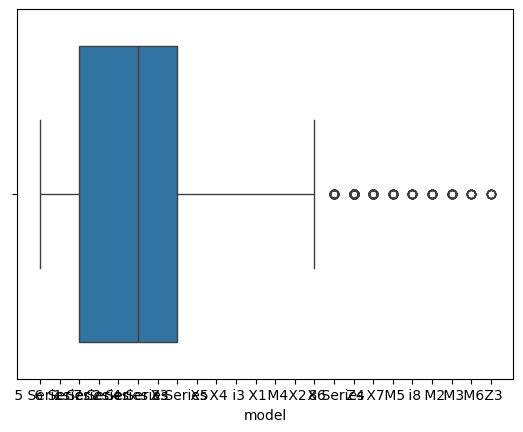

model ****************************************************************************************************


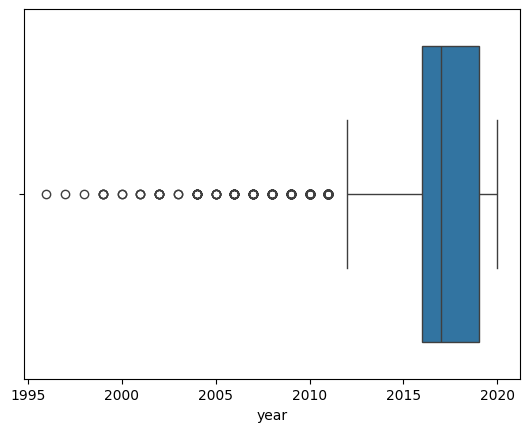

year ****************************************************************************************************


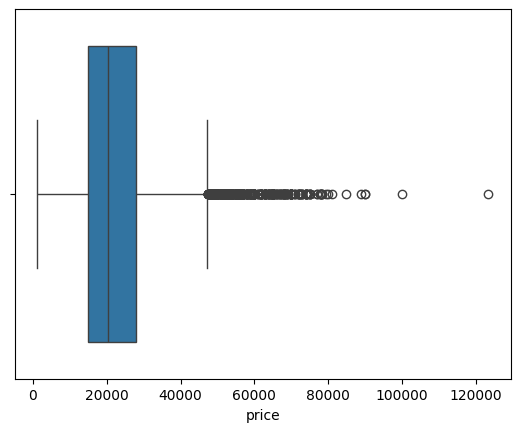

price ****************************************************************************************************


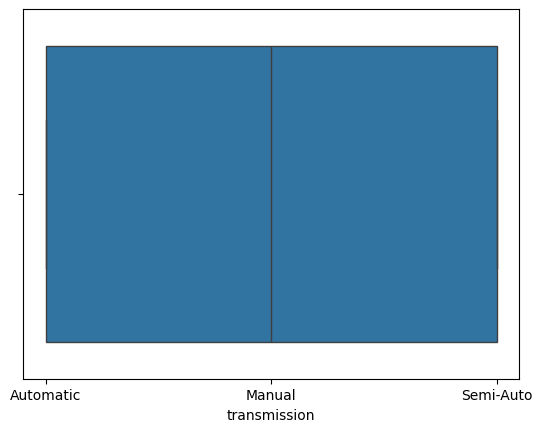

transmission ****************************************************************************************************


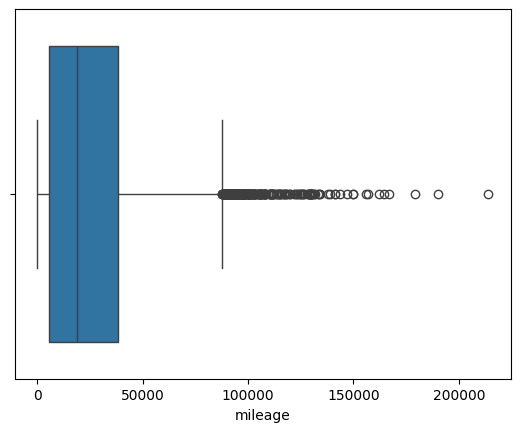

mileage ****************************************************************************************************


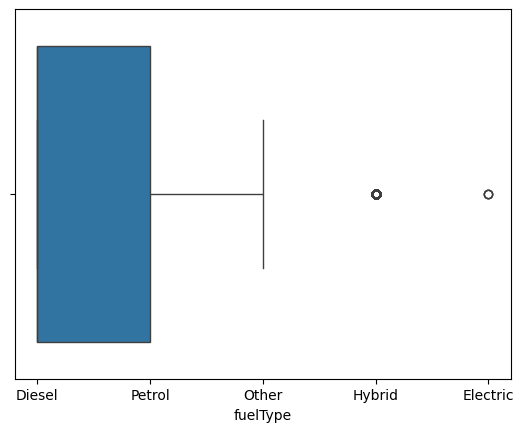

fuelType ****************************************************************************************************


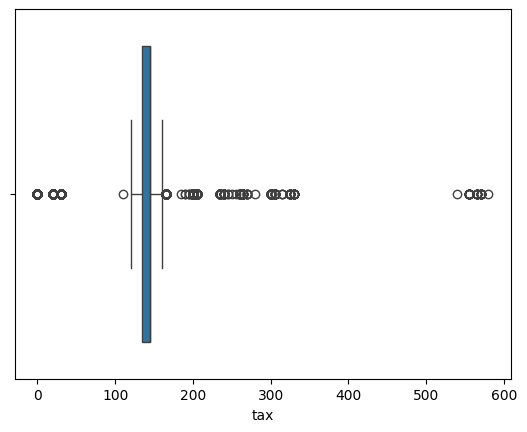

tax ****************************************************************************************************


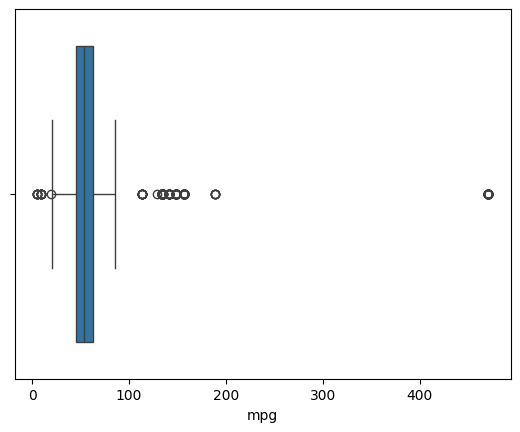

mpg ****************************************************************************************************


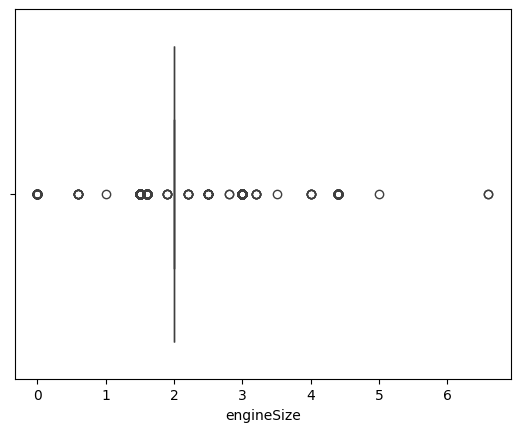

engineSize ****************************************************************************************************


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
  sns.boxplot(x=df[i])
  plt.show()
  print(i,'*'*100)

# **TRAINING**

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [17]:
corl = df.corr()['price']
corl

,price
model,0.468189
year,0.623754
price,1.000000
transmission,0.215091
mileage,-0.605473
fuelType,0.106175
tax,0.264178
mpg,-0.203986
engineSize,0.461750


In [18]:
df.drop('mileage',axis=1,inplace=True)

In [19]:
df.drop('mpg',axis=1,inplace=True)

In [76]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize
0,4,2014,11200,0,0,125,2.0
1,5,2018,27000,0,4,145,2.0
2,4,2016,16000,0,0,160,3.0
3,0,2017,12750,0,0,145,1.5
4,6,2014,14500,0,0,160,3.0


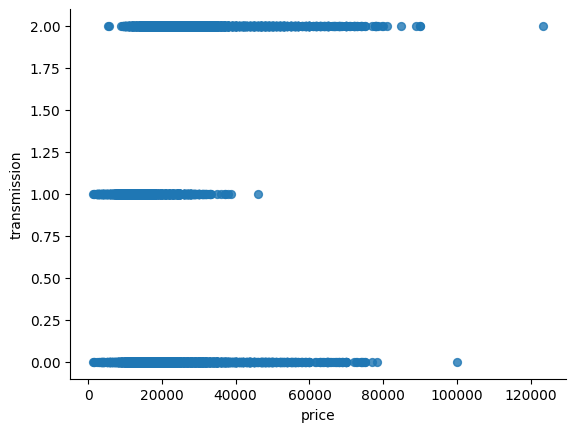

In [84]:
# @title price vs transmission

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='transmission', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

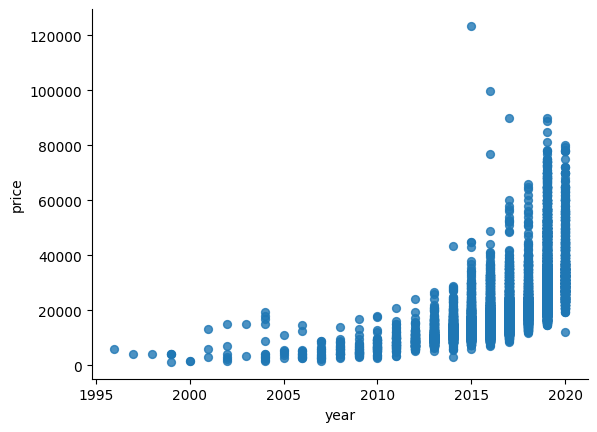

In [81]:
# @title year vs price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='year', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
x = df.drop('price',axis=1)
y = df['price']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **KNN**

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [24]:
y_pred = knn.predict(x_test)

In [25]:
print(y_pred)

[21777.6 13242.8 39170.8 ... 19845.8 27766.2 25881.6]


In [26]:
trainingscore = knn.score(x_train,y_train)
testscore = knn.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.9189487316555239
Testing Score =  0.9078477746450078


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 12251954.958687296
R-squared: 0.9078477746450078


# **Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [29]:
y_pred1 = dt.predict(x_test)

In [30]:
y_pred1

array([23987.5       , 13428.1       , 38135.46153846, ...,
       18896.75862069, 26220.97435897, 27336.62251656])

In [31]:
trainingscore = dt.score(x_train,y_train)
testscore = dt.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.9416253252279733
Testing Score =  0.9146549245411726


In [32]:
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 11346920.99338082
R^2 Score: 0.9078477746450078


In [33]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'fuelType', 'tax',
       'engineSize'],
      dtype='object')

[Text(0.6830885167218119, 0.9761904761904762, 'year <= 0.608\nsquared_error = 130191234.057\nsamples = 8531\nvalue = 22673.972'),
 Text(0.466160238510895, 0.9285714285714286, 'engineSize <= 1.314\nsquared_error = 47242379.369\nsamples = 5241\nvalue = 16947.437'),
 Text(0.27053694656697863, 0.8809523809523809, 'year <= -0.645\nsquared_error = 28028874.233\nsamples = 3965\nvalue = 15153.724'),
 Text(0.13216732323047675, 0.8333333333333334, 'year <= -1.481\nsquared_error = 24946901.204\nsamples = 1301\nvalue = 11567.183'),
 Text(0.05348968996782685, 0.7857142857142857, 'year <= -2.734\nsquared_error = 8532005.554\nsamples = 443\nvalue = 8613.038'),
 Text(0.025307107341327875, 0.7380952380952381, 'tax <= 4.924\nsquared_error = 6432378.179\nsamples = 89\nvalue = 4820.438'),
 Text(0.024839134249780636, 0.6904761904761905, 'engineSize <= -2.473\nsquared_error = 5428670.883\nsamples = 88\nvalue = 4710.443'),
 Text(0.0243711611582334, 0.6428571428571429, 'squared_error = 0.0\nsamples = 1\nvalue

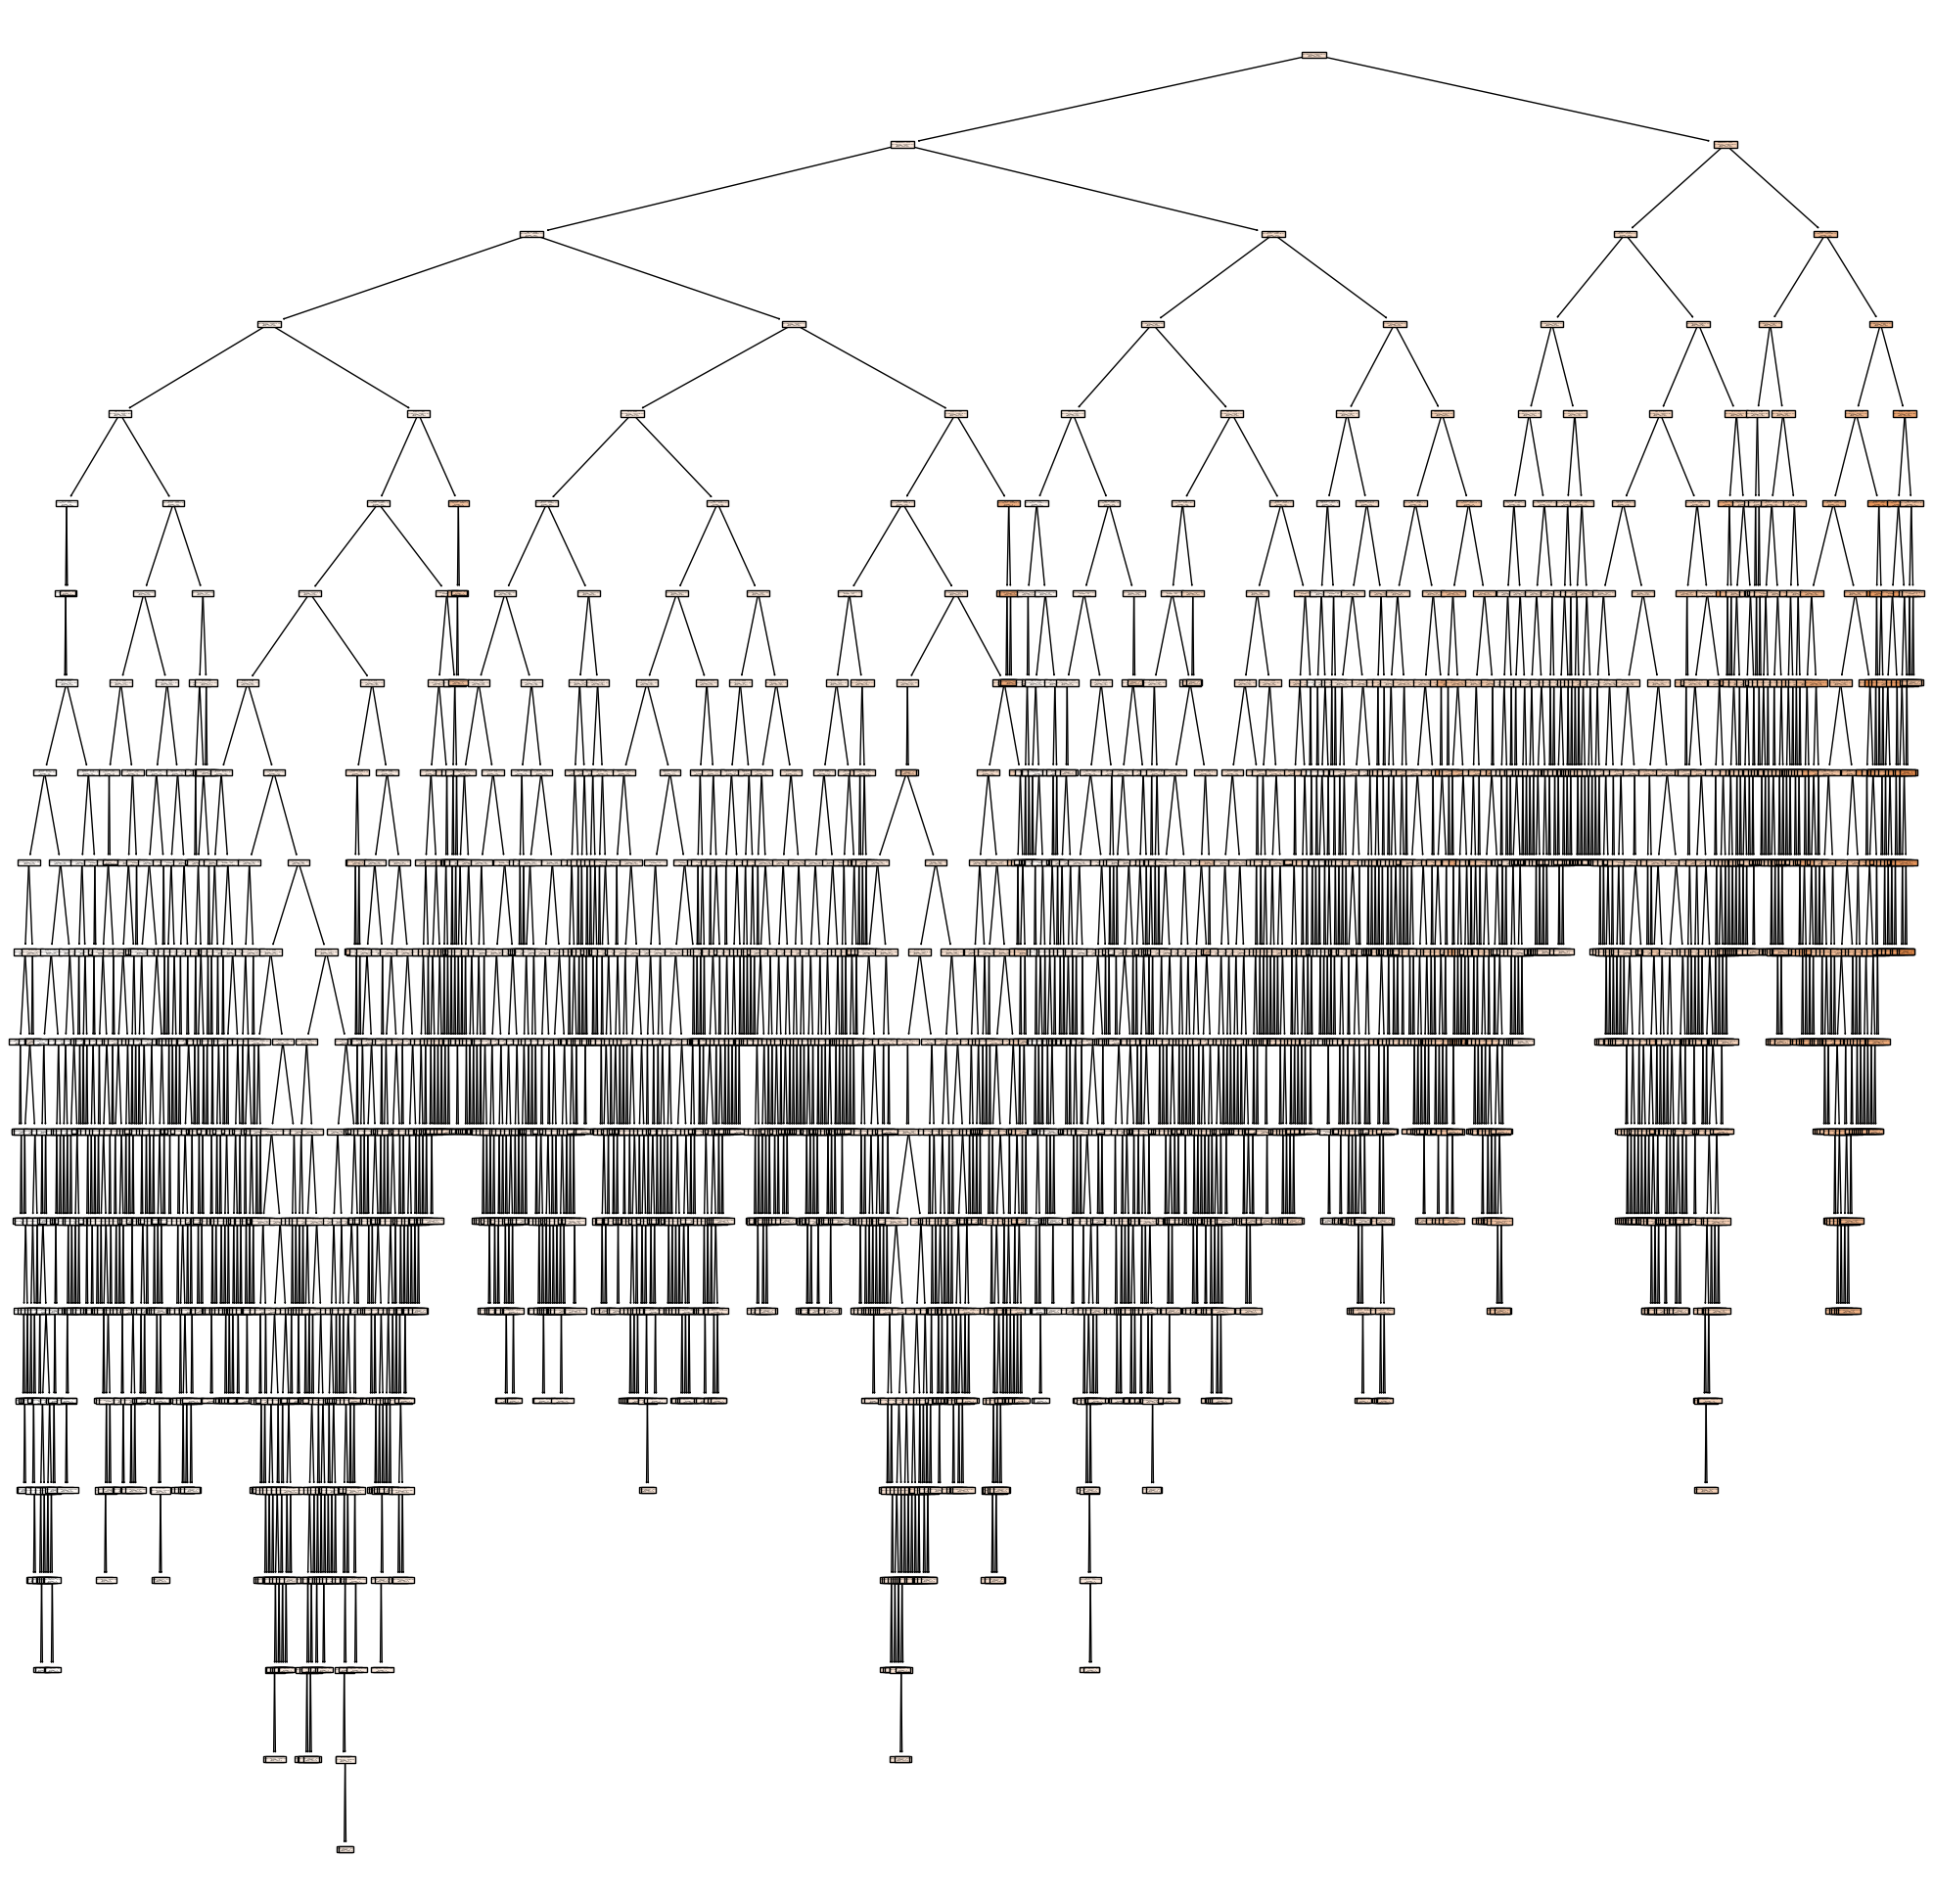

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
tree.plot_tree(dt)
tree.plot_tree(dt,feature_names=['model', 'year', 'price', 'transmission', 'tax',
        'engineSize'],class_names=['0','1'],filled=True)

# **SVM**

In [35]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [36]:
y_pred2 = svm.predict(x_test)
y_pred2

array([20573.61976275, 20030.84171573, 20870.21962988, ...,
       20240.12049172, 20727.35500343, 20710.9258601 ])

In [37]:
trainingscore = svm.score(x_train,y_train)
testscore = svm.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.01654283780257082
Testing Score =  0.013000467767806834


In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 12251954.958687296
R^2 Score: 0.9078477746450078


In [39]:
from sklearn.svm import SVR
svm1 = SVR(kernel='poly')
svm1.fit(x_train, y_train)

SVR(kernel='poly')

In [40]:
y_pred2 = svm1.predict(x_test)
y_pred2

array([20925.59519385, 20078.87264094, 20839.03616033, ...,
       20290.95528421, 20456.73393087, 20455.14799605])

In [41]:
trainingscore = svm1.score(x_train,y_train)
testscore = svm1.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.07822540829544322
Testing Score =  0.0783187859764185


In [42]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 122540683.92796975
R^2 Score: 0.0783187859764185


In [43]:
from sklearn.svm import SVR
svm2 = SVR(kernel='sigmoid')
svm2.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [44]:
y_pred3 = svm2.predict(x_test)
y_pred3

array([21355.98514442, 19720.63271194, 21700.29014799, ...,
       20003.07172143, 20822.28415263, 20788.93583793])

In [45]:
trainingscore = svm2.score(x_train,y_train)
testscore = svm2.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.10365329421228142
Testing Score =  0.10030856297564872


In [46]:
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 119617067.52795027
R^2 Score: 0.10030856297564872


In [47]:
from sklearn.svm import SVR
svm3 = SVR(kernel='linear')
svm3.fit(x_train, y_train)

SVR(kernel='linear')

In [48]:
y_pred4 = svm3.predict(x_test)
y_pred4

array([23915.27659646, 17545.73186543, 26912.50482753, ...,
       19979.90006735, 22793.2089378 , 22713.25736701])

In [49]:
trainingscore = svm3.score(x_train,y_train)
testscore = svm3.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.4991244781926081
Testing Score =  0.4999933291429789


In [50]:
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 66477604.71094835
R^2 Score: 0.4999933291429789


# **Linear Regression**

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred5 = regressor.predict(x_test)
y_pred5

array([28726.03351441, 14771.20654687, 35545.82310672, ...,
       18437.94936172, 24439.70993775, 24468.50087675])

In [53]:
trainingscore = regressor.score(x_train,y_train)
testscore = regressor.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.7147548765352759
Testing Score =  0.7392447456305524


In [54]:
mse = mean_squared_error(y_test,y_pred5)
r2 = r2_score(y_test, y_pred5)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 34668306.917912625
R^2 Score: 0.7392447456305524


# **Ensemble Learning**

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20,criterion='squared_error',max_depth=5,max_features=5)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=20)

In [56]:
y_pred6 = rf.predict(x_test)


In [57]:
y_pred6

array([21837.84718404, 16178.68803466, 37677.11511873, ...,
       20830.21060639, 28211.80211452, 28211.80211452])

In [58]:
trainingscore = rf.score(x_train,y_train)
testscore = rf.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.877133724200223
Testing Score =  0.8823679803575378


In [59]:
mse = mean_squared_error(y_test, y_pred6)
r2 = r2_score(y_test, y_pred6)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 15639581.14746482
R^2 Score: 0.8823679803575378


In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [61]:
rfc = RandomForestRegressor(n_estimators=20)
rfc.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20)

In [62]:
y_pred =rfc.predict(x_test)

In [63]:
param_dist ={"max_depth":[3,4,5,6,78,None],
             "max_features":sp_randint(1,11),
             "min_samples_split":sp_randint(2,11),
             "criterion":['squared_error','absolute_error']}

In [64]:
rfc1 = RandomForestRegressor(n_estimators=20)


In [65]:
#

In [66]:
#

In [67]:
randomCV = RandomizedSearchCV(rfc1,param_distributions=param_dist,cv=10)

In [68]:
randomCV.fit(x_train,y_train)
print(randomCV.best_params_)

{'criterion': 'squared_error', 'max_depth': 78, 'max_features': 5, 'min_samples_split': 10}


In [69]:
from sklearn.ensemble import RandomForestRegressor
rfc2 = RandomForestRegressor(n_estimators=50,criterion='squared_error',max_depth=78,max_features=4,min_samples_split=8)
rfc2.fit(x_train,y_train)

RandomForestRegressor(max_depth=78, max_features=4, min_samples_split=8,
                      n_estimators=50)

In [70]:
rfc2.fit(x_train,y_train)
y_pred_7 = rfc2.predict(x_test)

In [71]:
y_pred_7

array([22400.85191331, 13436.51438353, 38358.0664017 , ...,
       18898.18795991, 26205.4941167 , 27333.46429176])

In [72]:
trainingscore = rfc2.score(x_train,y_train)
testscore = rfc2.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)

Training Score =  0.9350535283212857
Testing Score =  0.9236685518346723


In [73]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_7)
r2 = r2_score(y_test, y_pred_7)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10148528.277535563
R-squared: 0.9236685518346723


VS

In [ ]:
# GUI

In [74]:
import pickle

pickle.dump(rfc2,open('bmw.sav','wb'))

In [75]:
import pickle

pickle.dump(sc,open('std_scalar_bmw_.sav','wb'))